In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log
from astropy.table import Table
from astropy.table import Column

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
t = Table.read('adjusted.fits', format='fits')

In [4]:
print(t)

     Source_Name               RA         ... PanSTARRS_missing
---------------------- ------------------ ... -----------------
ILTJ104345.35+523239.2 160.93896565257427 ...             False
ILTJ104347.01+523145.1 160.94586125313552 ...             False
ILTJ104349.41+522333.4 160.95588630837182 ...             False
ILTJ104408.30+520810.1 161.03459499020352 ...             False
ILTJ104418.39+523205.4 161.07663290149634 ...             False
ILTJ104418.95+524612.3  161.0789652377806 ...             False
ILTJ104422.89+520947.0 161.09538625701006 ...             False
ILTJ104435.02+520436.8 161.14589797337828 ...             False
ILTJ104436.16+521321.3   161.150663907738 ...             False
ILTJ104441.57+522653.1  161.1731935721447 ...             False
                   ...                ... ...               ...
ILTJ152208.13+522414.1 230.53386793590374 ...             False
ILTJ152232.31+532127.9 230.63461286029684 ...             False
ILTJ152236.00+530247.8 230.6500175555704

In [5]:
hdul = fits.open('adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band
C = data.field('DC_maj')

In [6]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [7]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm
Lum_dG = array(cosmo.luminosity_distance([Flux_g])*3.08567758e24) ### Last number converts it into cm

In [8]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-26/(1+z))
    return P
Pw22 = (power(Lum_d22,Flux_22,z))
Pw = (power(Lum_d,flux_tot,z)*(1+z)**(-0.7))
Pw_g  = (power(Lum_dG,Flux_g,z))


In [9]:
A = np.reshape(Pw22,(36906,))
aa = Column(A, name='Pw22')
t.add_column(aa, index=0) 


In [16]:
adj = np.where(Pw22>=4e43)
#adj1 = np.where(Pw>=4e43)
Pw_adj = array((Pw22[adj])) # This is the luminosity at 22 microns
Pw_adj1 = array((Pw[adj])) # This is the luminosity at 151 MHz
Pw_g_H = array((Pw_g[adj])) # Optical luminosity >> This is the one to use to distinguish H & L

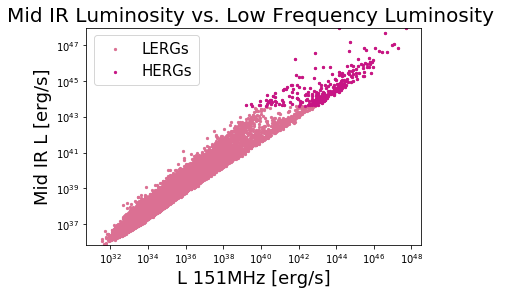

In [10]:
#Limit=[]
#for j in range(len(Pw)):
    #Limit.append(4e43)

    
#logPlot = plt.gca()
#logPlot.loglog(Pw,Limit,'r--',c='black')
plt.scatter(Pw, Pw22,s =5, c='palevioletred',label='LERGs')
plt.scatter(Pw_adj1 ,Pw_adj ,s =5 ,c='mediumvioletred',label='HERGs')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0,1e48)
plt.title('Mid IR Luminosity vs. Low Frequency Luminosity ',fontsize = 20)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('L 151MHz [erg/s]', fontsize = 18)
plt.ylabel('Mid IR L [erg/s]', fontsize = 18)
plt.show()

In [17]:
## Convert erg to J >>> WHz^-1
L_low_f = Pw_adj1*1e-7
L_mid_IR = Pw_adj*1e-7
L_opti = Pw_g_H*1e-7

z_new  = z[:5776,]


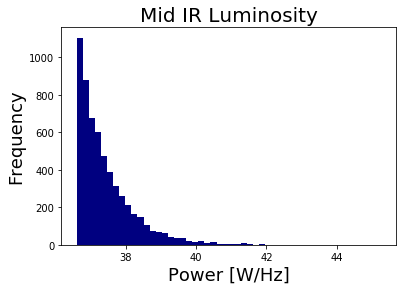

In [11]:
import plotly.plotly as py
plt.hist(np.log10(L_mid_IR), color= "navy", bins = 50)
plt.title("Mid IR Luminosity", fontsize = 20)
plt.xlabel("Power [W/Hz]", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0,1e37)
rwidth=20
fig = plt.gcf()

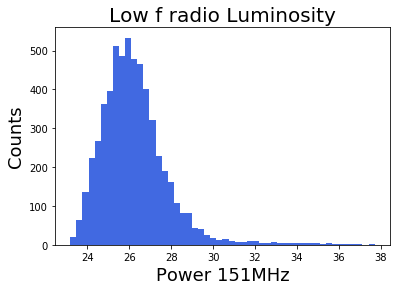

In [12]:
plt.hist(np.log10(L_low_f), facecolor= 'royalblue', bins = 50)
plt.title("Low f radio Luminosity", fontsize = 20)
plt.xlabel("Power 151MHz", fontsize= 18)
plt.ylabel("Counts", fontsize = 18)
#plt.xscale('log')
#plt.xlim(1e34,1e36)
fig = plt.gcf()

In [13]:
#Pw_adj.tolist()

Text(0,0.5,'Power [W$Hz^-1$]')

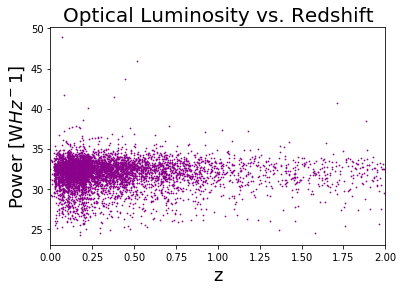

In [14]:
plt.scatter(z_new, np.log10(L_opti), s = 0.5, c='darkmagenta')
#plt.yscale('log')
plt.title('Optical Luminosity vs. Redshift',size=20)
#plt.ylim(0,1e38)
plt.xlim(0,2)
plt.xlabel("z",size=18)
plt.ylabel("Power [W$Hz^-1$]",size=18)

Text(0,0.5,'Power [W$Hz^-1$]')

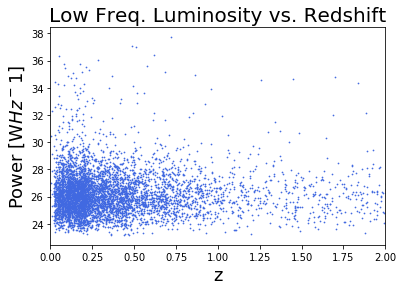

In [15]:
plt.scatter(z_new, np.log10(L_low_f), s = 0.5, c='royalblue')
plt.xlim(0,2)
#plt.ylim(1e21,1e35)
#plt.yscale('log')
plt.title('Low Freq. Luminosity vs. Redshift',size=20)
plt.xlabel("z",size=18)
plt.ylabel("Power [W$Hz^-1$]",size=18)

In [16]:
a  = np.log10(1+z)

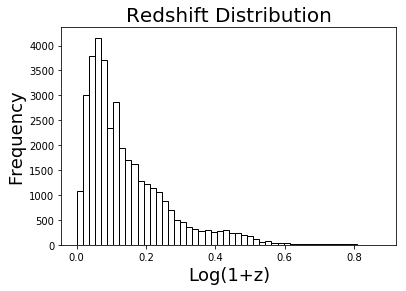

In [17]:
plt.hist(a, color= "navy", bins = 50, fill = False)
plt.title("Redshift Distribution", fontsize = 20)
plt.xlabel("Log(1+z)", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
#plt.xscale('log')
#plt.yscale('log')
rwidth=10
fig = plt.gcf()

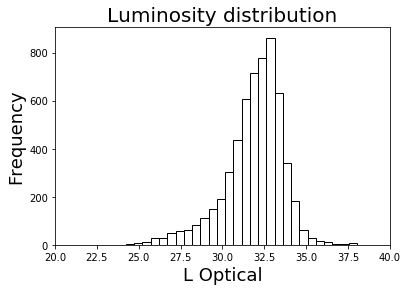

In [18]:
b= np.log10(L_opti)

plt.hist(b, color= "navy", bins = 50, fill = False)
plt.title("Luminosity distribution", fontsize = 20)
plt.xlabel("L Optical", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
plt.xlim(20,40)
rwidth=10
fig = plt.gcf()

# Result of Crossmatch

In [48]:
hdul2 = fits.open('crossmatch.fits')
data = hdul2[1].data
flux = data.field('Total_flux') # Obtain the total flux column 
redshift = data.field('z_best') # Obtain redshift column
flux_22 = data.field('w4Flux') # Obtain 22 microns flux
flux_g = data.field('gFApflux') # Obtain flux for g band
redshift.sort()

In [49]:
Q_d = array(cosmo.luminosity_distance([flux_g])*3.08567758e24) 
pw_g  = (power(Q_d,flux_g,redshift))
#Quasar_opti_P = Pw_g*1e-7


Lum_D = array(cosmo.luminosity_distance([flux])*3.08567758e24) 
pw = (power(Lum_D,flux,redshift))
#(1+redshift)**(-0.7)

Lum_D22 = array(cosmo.luminosity_distance([flux_22])*3.08567758e24)
pw22 = (power(Lum_D22,flux_22,redshift))

Adj = np.where(pw22>=4e43)

# FIND DATA FOR QUASARS

Quasar_mid_IR = array((pw22[Adj])*1e-7)
Quasar_Low_P = array((pw[Adj])*1e-7) 
Quasar_opti_P = array((pw_g[Adj])*1e-7)

z_QSO = redshift[:432,]


In [50]:
# FIND DATA FOR RADIO GALAXIES


RG_low = (set(L_low_f)-set(Quasar_Low_P))
P_RG_low  = array(list(RG_low))

RG_IR = (set(L_mid_IR)-set(Quasar_mid_IR))
P_RG_IR  = array(list(RG_IR))

RG_opti = (set(L_opti)-set(Quasar_opti_P))
P_RG_opti  = array(list(RG_opti))
Cut1 = np.where(P_RG_low >1e25)

z_RG = z[:5776,]

# Find Linear Size

In [25]:
# Import desired parameters >>> DC_maj and LGZ size
dc_maj = data.field('DC_maj')
DC_maj = array(dc_maj)
A = data.field('LGZ_size')
LGZ = np.nan_to_num(A)
DC = np.nan_to_num(DC_maj)
# Calculate angular distance using python function
ad_QSO = array(cosmo.angular_diameter_distance(z_QSO)*1e3) #This is in Kiloparsecs
ad_RG = array(cosmo.angular_diameter_distance(z_RG)*1e3)



In [43]:
def LZ(ang_d,dc):
    linear_size = ang_d*dc*(np.pi/180)
    return linear_size